# Exploring the Relationship Between Different Domains of the IMD via Scatter Plots


In [2]:
#Import Data As Before
import geopandas as gpd
import pandas as pd

# Load IMD data with geometries and filter to relevant columns only
full_imd_gdf = gpd.read_file("data/IMD_2019.geojson")

imd_gdf = full_imd_gdf.drop(['lsoa11cd','lsoa11nm','lsoa11nmw', 'IMD_Rank', 'IMD_Decile','LSOA01NM',
    'IMDScore','IncScore','EmpScore','EduScore','HDDScore', 'CriScore','BHSScore','EnvScore',
    'IDCScore','IDCRank','IDCDec','IDOScore','IDORank','IDODec','CYPScore', 'CYPRank', 'CYPDec',
    'ASScore','ASRank', 'ASDec', 'GBScore','GBRank', 'GBDec', 'WBScore', 'WBRank','WBDec', 'IndScore',
    'IndRank', 'IndDec','OutScore','OutRank','OutDec', 'TotPop','DepChi','Pop16_59','Pop60_','WorkPop',],axis = 1)

## Exploring the relationships between variables across England as a whole

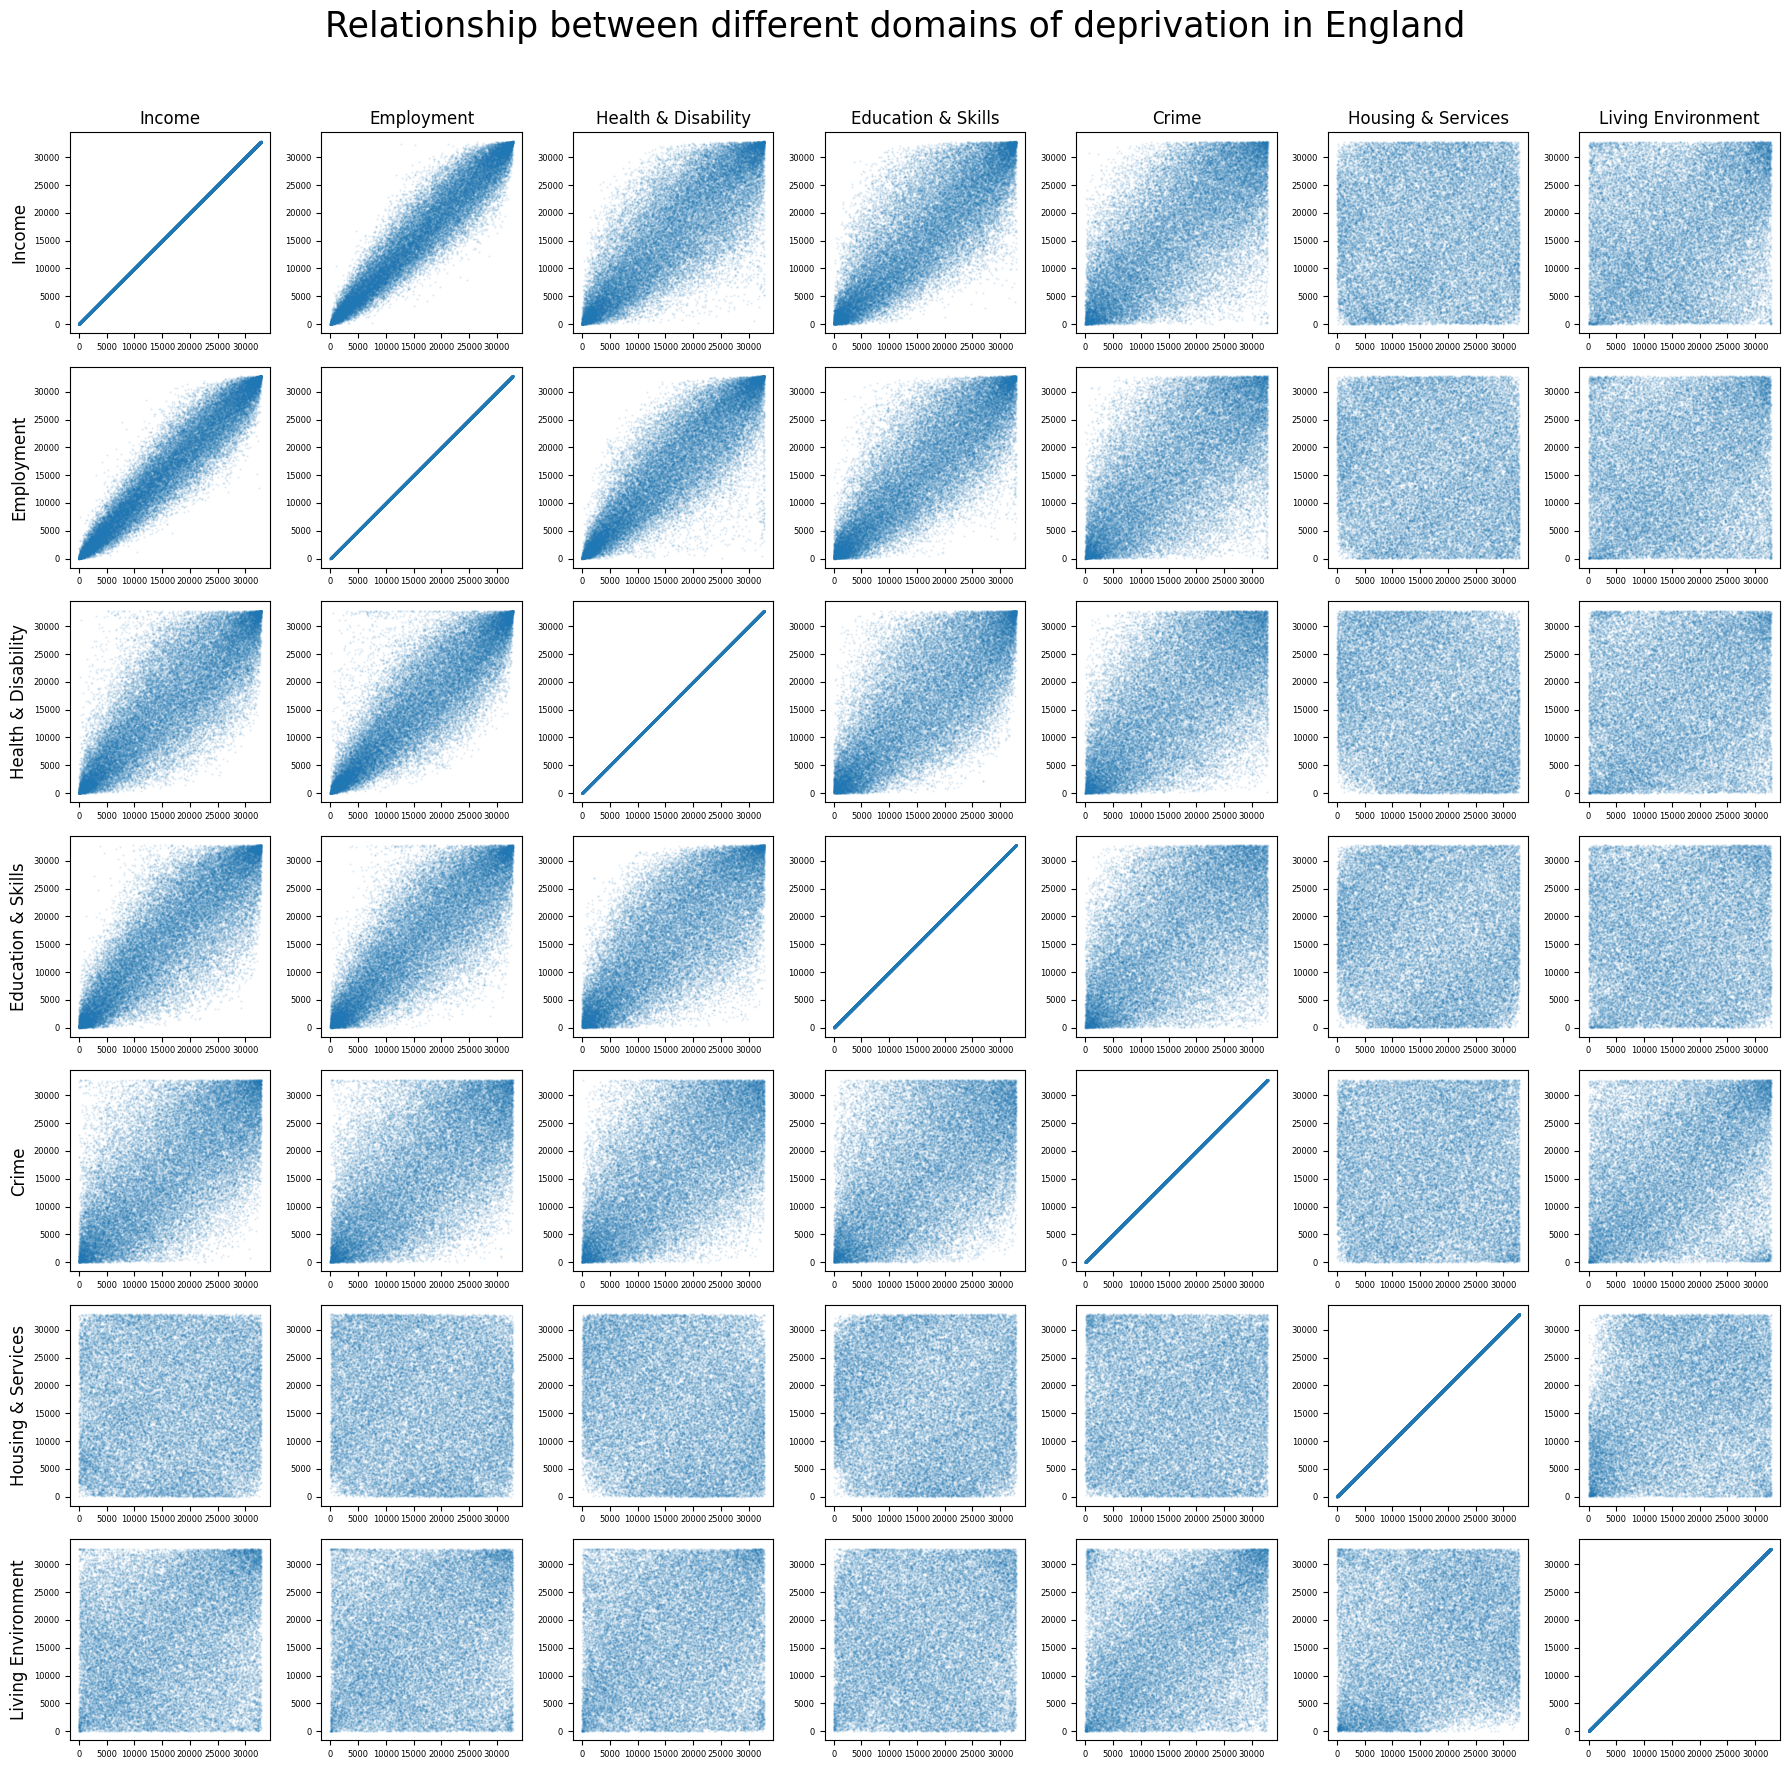

In [3]:
import matplotlib.pyplot as plt

#Simplified & improved code for the above!

# Define domain rank columns and corresponding titles
domains = [
    ("IncRank", "Income"),
    ("EmpRank", "Employment"),
    ("HDDRank", "Health & Disability"),
    ("EduRank", "Education & Skills"),
    ("CriRank", "Crime"),
    ("BHSRank", "Housing & Services"),
    ("EnvRank", "Living Environment")
]

# Create subplots
fig, axes = plt.subplots(len(domains), len(domains), figsize=(18, 18))
fig.suptitle("Relationship between different domains of deprivation in England", fontsize=25)

# Loop through domain pairs and plot
for i, (x_col, x_label) in enumerate(domains):
    for j, (y_col, y_label) in enumerate(domains):
        ax = axes[i, j]
        ax.scatter(imd_gdf[x_col], imd_gdf[y_col], alpha=0.1, s=0.5)
        
        # Only set title and labels on outer edges for clarity
        if i == 0:
            ax.set_title(y_label, fontsize=12)
        if j == 0:
            ax.set_ylabel(x_label, fontsize=12)

        ax.tick_params(labelsize=6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [19]:
#Find correlations

# Extract just the column names
domain_cols = [col for col, _ in domains]

#Compute correlation matrix
correlation_matrix = imd_gdf[domain_cols].corr()

# Use readable names for rows and columns
labels = [label for _, label in domains]
correlation_matrix.columns = labels
correlation_matrix.index = labels

#Show in a nice matrix form
from IPython.display import display

display(correlation_matrix.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).format("{:.2f}"))



### Conclusion:

Income, Employment, Health and Education all have strong positive correlations between themselves. They are also slightly mildly positively correlated to crime.

The Barriers to Housing and Services and Living Environment variables are not significantly correlated to any other variables, except mildly correlated to each other. Interestingly, barriers to housing and services is actualy negatively correlated with employment, education & skills and health & disability.

## Exploring Relationships Between Variables within Local Authorities

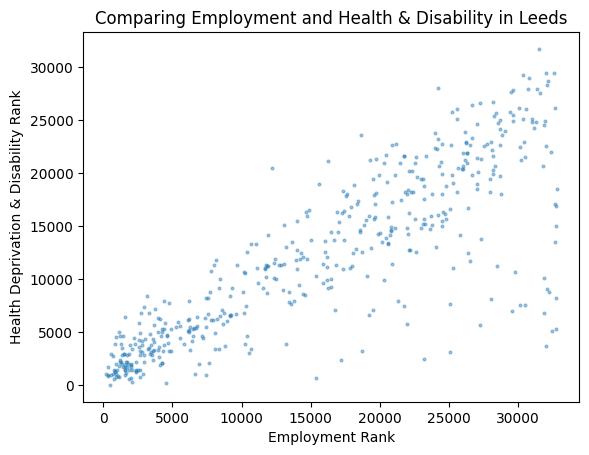

In [28]:
#Exploring within local authorities: Leeds
leeds_imd_gdf = imd_gdf[imd_gdf["LADnm"] == "Leeds"]
plt.scatter(leeds_imd_gdf["EmpRank"], leeds_imd_gdf["HDDRank"], alpha = 0.4, s =4)
plt.title("Comparing Employment and Health & Disability in Leeds")
plt.xlabel("Employment Rank")
plt.ylabel("Health Deprivation & Disability Rank")
plt.show()

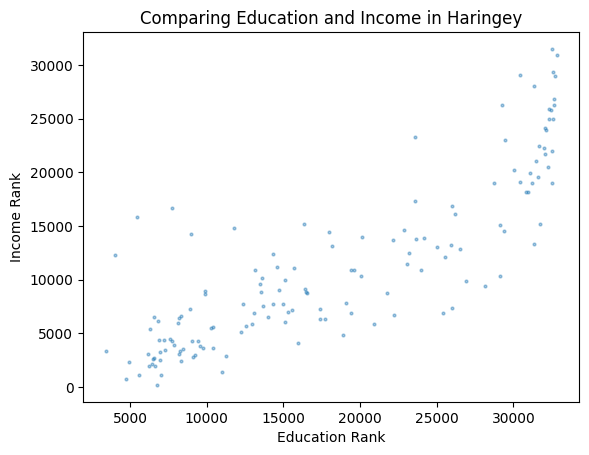

In [21]:
#Exploring within local authorities: Haringey

haringey_imd_gdf = imd_gdf[imd_gdf["LADnm"] == "Haringey"]
plt.scatter(haringey_imd_gdf["EduRank"], haringey_imd_gdf["IncRank"], alpha = 0.4, s = 4)
plt.title("Comparing Education and Income in Haringey")
plt.xlabel("Education Rank")
plt.ylabel("Income Rank")
plt.show()

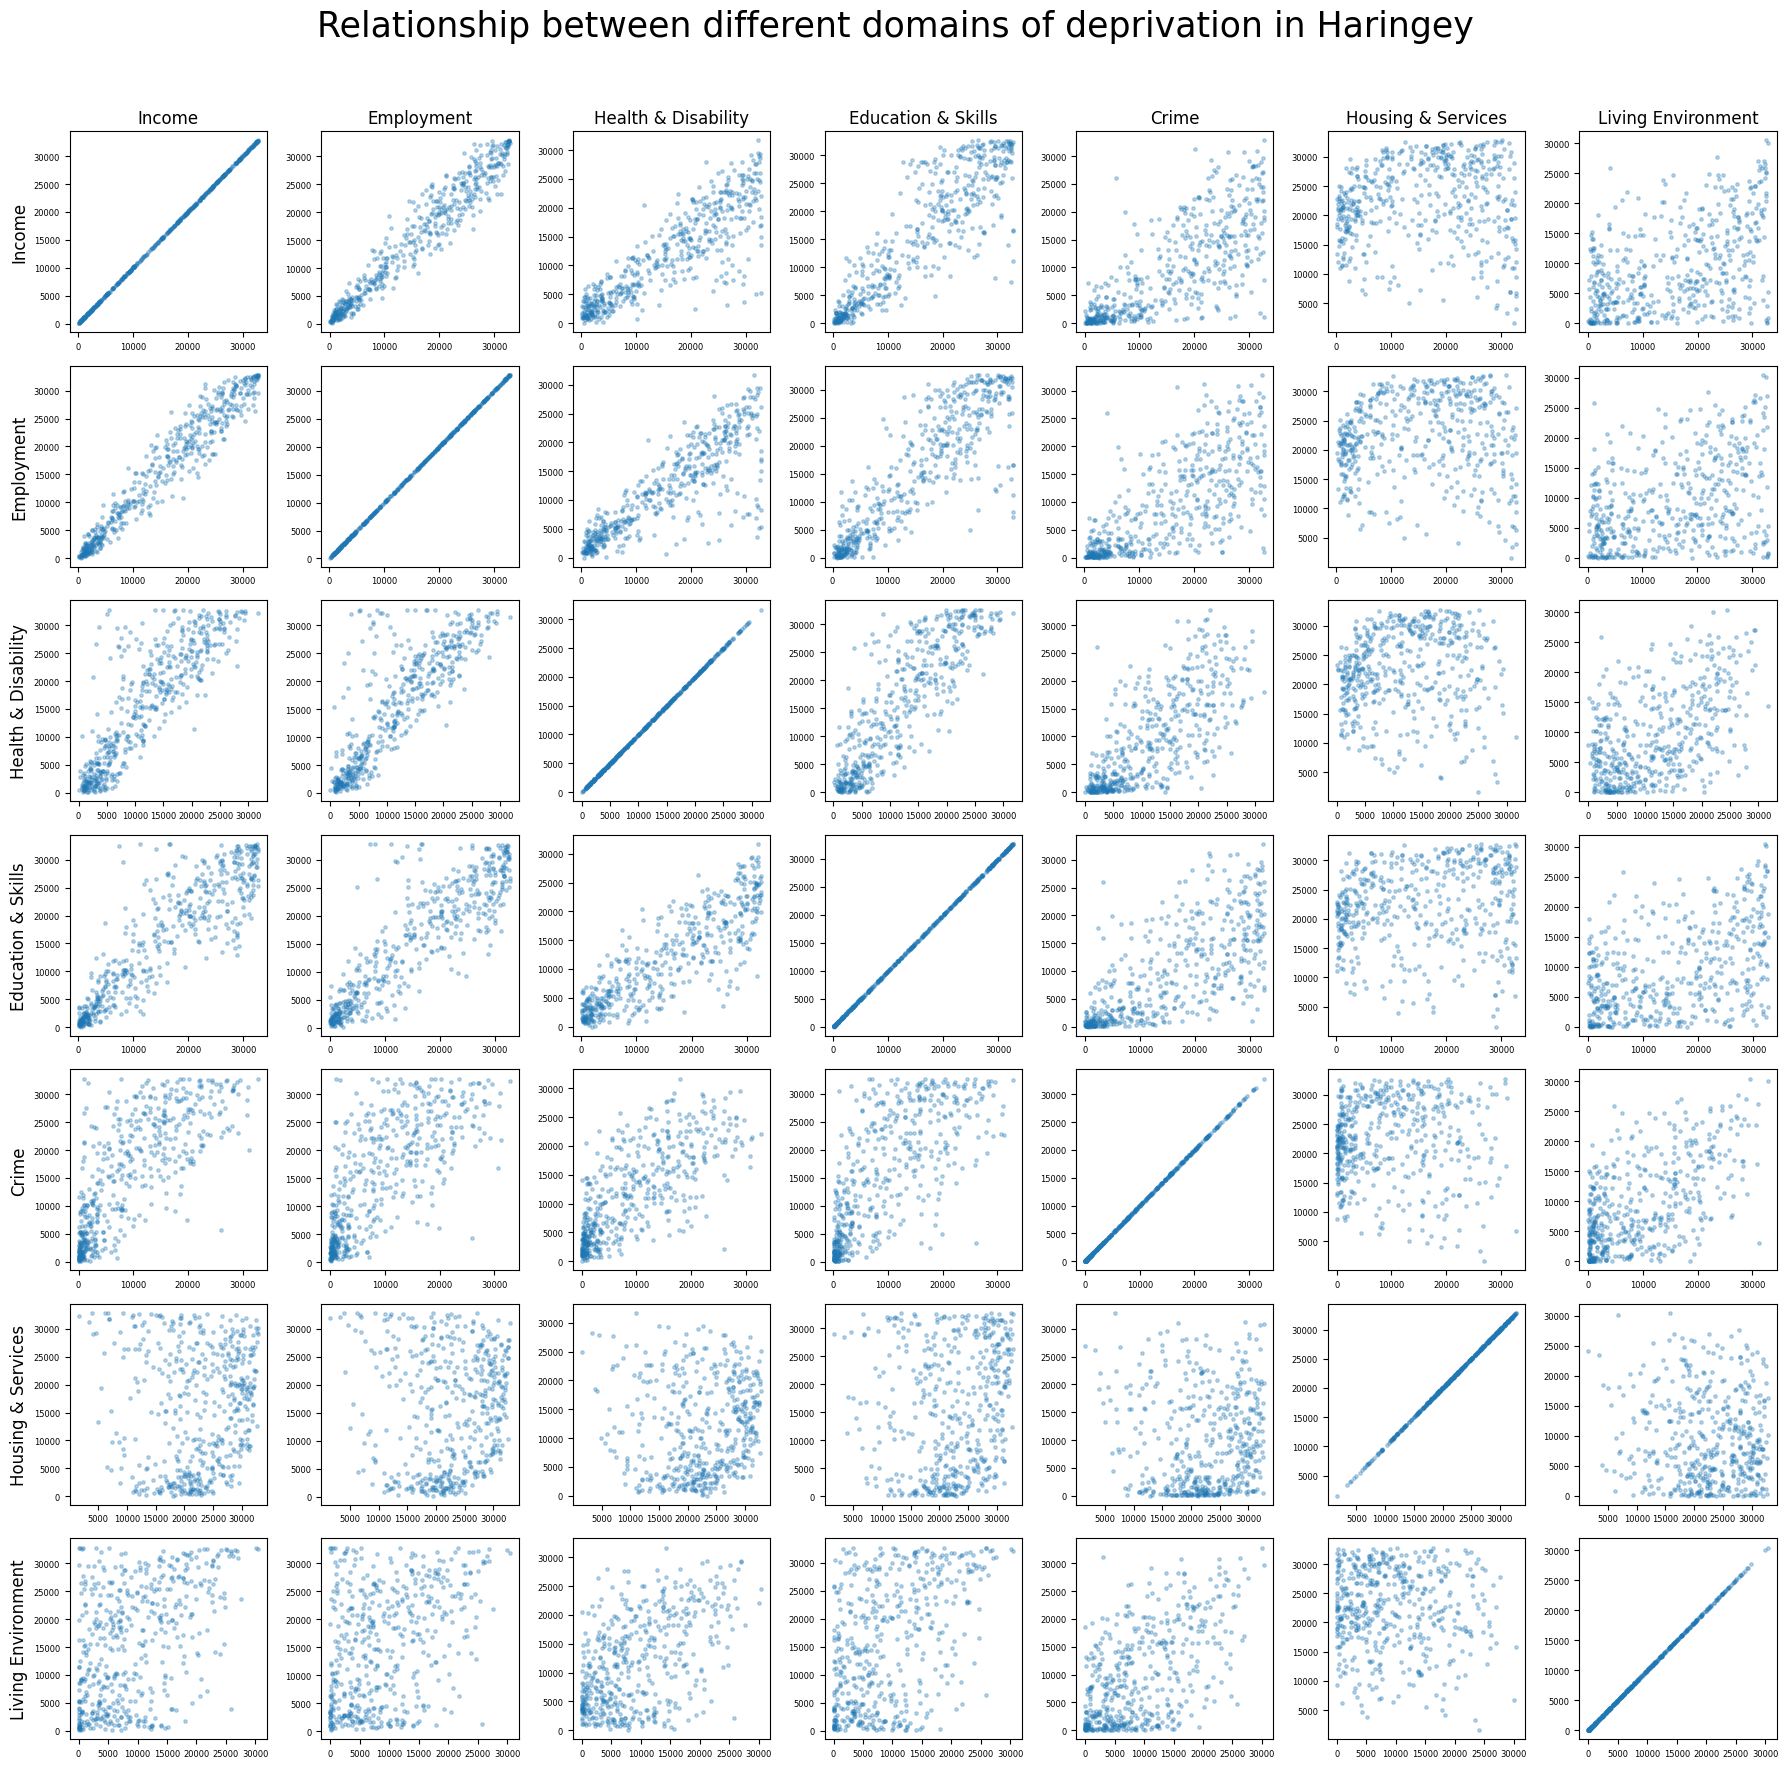

In [32]:
# Making the large matrix for Haringey

#Simplified & improved code for the above!

# Define domain rank columns and corresponding titles
domains = [
    ("IncRank", "Income"),
    ("EmpRank", "Employment"),
    ("HDDRank", "Health & Disability"),
    ("EduRank", "Education & Skills"),
    ("CriRank", "Crime"),
    ("BHSRank", "Housing & Services"),
    ("EnvRank", "Living Environment")
]

# Create subplots
fig, axes = plt.subplots(len(domains), len(domains), figsize=(18, 18))
fig.suptitle("Relationship between different domains of deprivation in Haringey", fontsize=25)

# Loop through domain pairs and plot
for i, (x_col, x_label) in enumerate(domains):
    for j, (y_col, y_label) in enumerate(domains):
        ax = axes[i, j]
        ax.scatter(leeds_imd_gdf[x_col], leeds_imd_gdf[y_col], alpha=0.3, s=6)
        
        # Only set title and labels on outer edges for clarity
        if i == 0:
            ax.set_title(y_label, fontsize=12)
        if j == 0:
            ax.set_ylabel(x_label, fontsize=12)

        ax.tick_params(labelsize=6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [ ]:
#Find correlations

# Extract just the column names
domain_cols = [col for col, _ in domains]

#Compute correlation matrix
correlation_matrix = leeds_imd_gdf[domain_cols].corr()

# Use readable names for rows and columns
labels = [label for _, label in domains]
correlation_matrix.columns = labels
correlation_matrix.index = labels

#Show in a nice matrix form
from IPython.display import display

display(correlation_matrix.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).format("{:.2f}"))

In [30]:
# Extract just the column names
domain_cols = [col for col, _ in domains]

#Compute correlation matrix
correlation_matrix = haringey_imd_gdf[domain_cols].corr()

# Use readable names for rows and columns
labels = [label for _, label in domains]
correlation_matrix.columns = labels
correlation_matrix.index = labels

#Show in a nice matrix form
from IPython.display import display

display(correlation_matrix.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).format("{:.2f}"))